In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform Distribution
Each of the possible outcomes is equally likely to be observed.

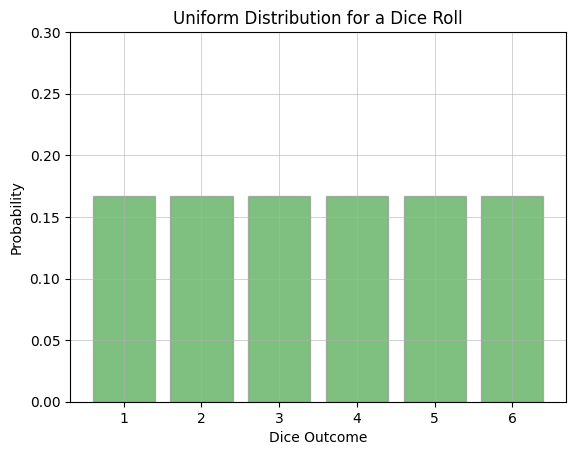

In [4]:
# Define the outcomes and their probabilities
outcomes = np.arange(1, 7)  # Set dice values: 1 to 6
probabilities = np.ones_like(outcomes) / len(outcomes)  # Assign equal probability to each outcome

# Plot the discrete distribution using a bar chart
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.bar(outcomes, probabilities, color='green', edgecolor='grey', alpha=0.5)

# Add labels, title, and grid
plt.title('Uniform Distribution for a Dice Roll')
plt.xlabel('Dice Outcome')
plt.ylabel('Probability')
plt.gca().set_ylim([0, 0.3])
plt.grid(linewidth = 0.4)

# Show the plot
plt.show()

# Binomial Distribution
It is a discrete **probability distribution of the number of successes** in  **sequence of n independent experiments**, each **asking yes/no question**, & each with it's own Boolean valued outcome: success (with probability p) or failure (with probability q=1-p).

In [5]:
from math import factorial

# For any random variable X ~ B(n, p),
# the probability of getting exactly 'x' succeses in 'n' independent bernoulli trial is:
# b(x; n, p) = P(X = x)
#            = nCx * p^x * ((1-p)^(n-x))
# Where, x = no. of successes ; x ε {0, 1, 2... n}
#        n = no of trials in an experiment; n ε N
#        p = probability of success; p ε [0, 1]
# We read b(x; 10, 0.6) as the variable X follows a binomial distribution with
# 10 trials and a likeihood of 0.6 to suceed on each individual trial.

def binomial_PMF(x, n, p):
    nCx = factorial(n) / (factorial(x) * factorial(n - x))  # Combination formuls
    probability = nCx * (p ** x) * ((1 - p) ** (n - x))     # Binomial formula
    return probability

# Alternatively use:
# from scipy.stats import binom
# binom.pmf(x, n, p) # x should be an array here

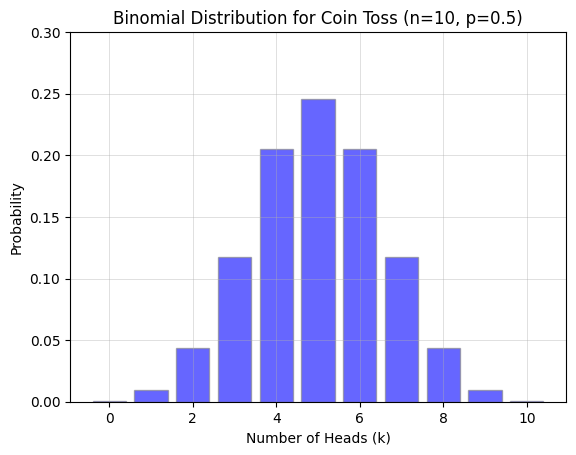

In [6]:
# Parameters
n = 10   # Number of trials (tosses)
p = 0.5  # Probability of success (heads)

# Define the outcomes and their probabilities
outcomes = np.arange(0, n + 1)                             # Possible number of heads (0 to n)
probabilities = [binomial_PMF(x, n, p) for x in outcomes]  # Probability mass function for binomial distribution

# Plot the binomial distribution
plt.bar(outcomes, probabilities, color='blue', edgecolor='grey', alpha=0.6)

# Add labels, title, and grid
plt.title('Binomial Distribution for Coin Toss (n=10, p=0.5)')
plt.xlabel('Number of Heads (k)')
plt.ylabel('Probability')
plt.gca().set_ylim([0, 0.3])
plt.grid(linewidth=0.4, alpha=0.7)

# Show the plot
plt.show()

# Poisson Distribution
It is a discrete probability distribution that expresses the **probability of a given number of events occuring**, in a **fixed interval of time**, if these **events occur with a known constant mean rate** & **independently of the time since the last event.**

Mathematically, a discrete random variable is said to have a Poisson's distribution, with parameter λ>0, if it has probability mass function given by:
<br/>f(x; λ) = P(X=x) = e^(-λ)/((λ^x)*x!)
<br/>Where, <br/>x = no. of successes of some random event.
       <br/>λ = mean occurence of that random event.

In [7]:
from math import exp, factorial

# Poisson PMF function
def poisson_PMF(x, lambd):
    probability = (lambd ** x * exp(-lambd)) / factorial(x)
    return probability

Consider a **bank which receives an average of λ=3 calls per minute** at all times of a day. If the **calls are independent** (receiving one does not change the probability of when the next one will arrive). Under these assumptions, the number 'x' of calls received during any minute has a poisson distribution. Receiving k = 1 to 4 calls then has a probability of about 0.77, while receving at least 5 calls has a probability of about 0.33.

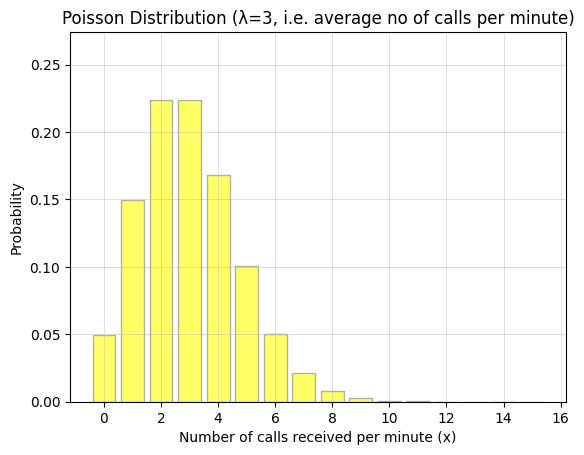

In [8]:
# Parameters
lambd = 3  # Average rate of occurrence (mean)
n = 15     # Number of outcomes to consider

# Define the outcomes and their probabilities
outcomes = np.arange(0, n + 1)                             # Possible number of occurrences (0 to n)
probabilities = [poisson_PMF(x, lambd) for x in outcomes]  # Probability mass function for Poisson distribution

# Plot the Poisson distribution
plt.bar(outcomes, probabilities, color='yellow', edgecolor='grey', alpha=0.6)

# Add labels, title, and grid
plt.title(f'Poisson Distribution (λ={lambd}, i.e. average no of calls per minute)')
plt.xlabel('Number of calls received per minute (x)')
plt.ylabel('Probability')
plt.gca().set_ylim([0, max(probabilities) + 0.05])  # Adjusting y-axis for better visualization
plt.grid(linewidth=0.4, alpha=0.7)

# Show the plot
plt.show()

# Normal Distribution
A normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is:
<br/>
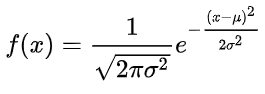
<br/>The parameter μ is the mean or expectation of the distribution, while the parameter σ is the standard deviation.

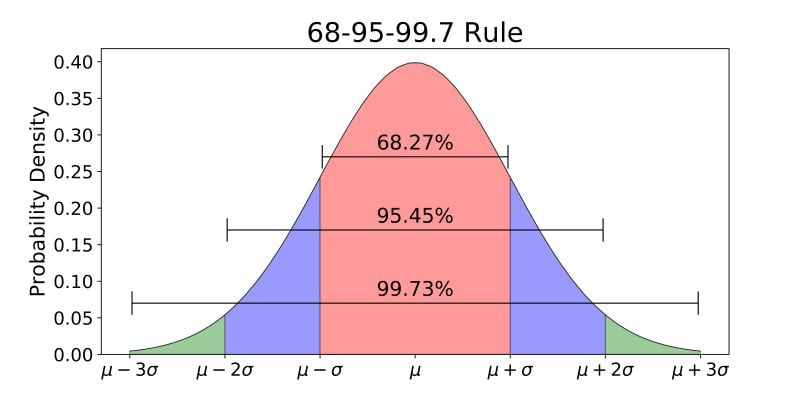
<br/>Image Source: https://builtin.com/data-science/empirical-rule

In [9]:
# Define the PDF for the normal distribution
def normal_PDF(x, mean, std_dev):
    coefficient = 1 / (std_dev * np.sqrt(2 * np.pi))
    exponent = -0.5 * ((x - mean) / std_dev) ** 2
    probability = coefficient * np.exp(exponent)
    return probability

Suppose, the average weight of deer in a forest is 100 kg, with standard deviation of 15 kg.

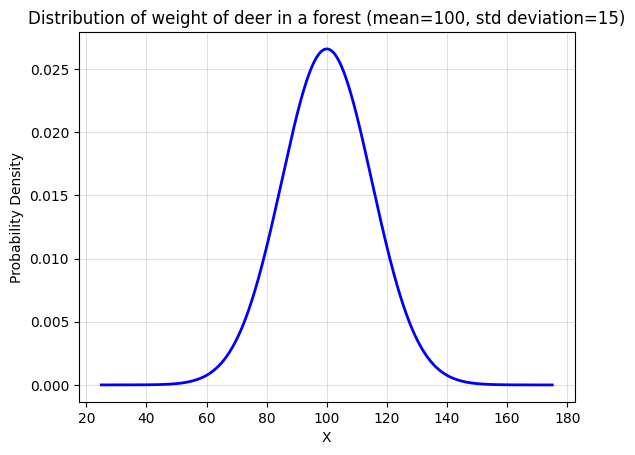

In [10]:
# Parameters
mean = 100      # Mean of the distribution
std_dev = 15    # Standard deviation of the distribution

# Generate a range of weights
weights = np.linspace(mean - 5 * std_dev, mean + 5 * std_dev, 1000)

# Calculate the normal distribution's probability density function (PDF)
pdf_values = [normal_PDF(x, mean, std_dev) for x in weights]

# Plot the normal distribution
# For plotting continous curves, see:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(weights, pdf_values, color='blue', linewidth=2)

# Add labels, title, and grid
plt.title(f'Distribution of weight of deer in a forest (mean={mean}, std deviation={std_dev})')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(linewidth=0.4, alpha=0.7)

# Show the plot
plt.show()